# Mean-Shift Clustering on Mall Customers Dataset (No Scaling)

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

In [4]:
# Load dataset
df = pd.read_csv("mall_customers.csv")

In [6]:
# Select features (no scaling)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Apply Mean-Shift clustering
model = MeanShift()
model.fit(X)

MeanShift()

In [10]:
# Extract labels and cluster centers
labels = model.labels_
cluster_centers = model.cluster_centers_

print("Number of clusters found:", len(cluster_centers))
print("Cluster centers:\n", cluster_centers)

Number of clusters found: 1
Cluster centers:
 [[55.82 51.  ]]


In [21]:
# Add cluster labels to the dataframe
df['Cluster'] = labels
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [23]:
df['Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Cluster, Length: 200, dtype: int64>

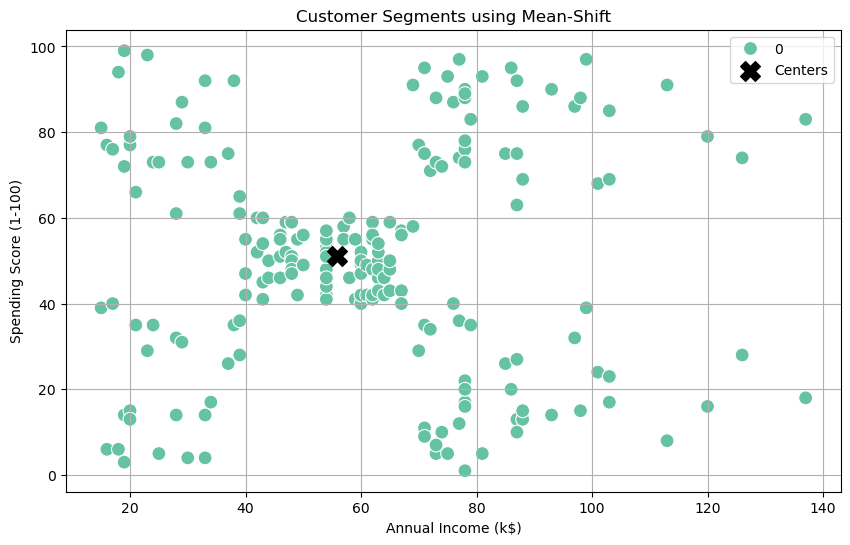

In [19]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='X', s=200, label='Centers')
plt.title("Customer Segments using Mean-Shift")
plt.legend()
plt.grid(True)
plt.show()